# <font color='blue'>Fabiano da Silva Feio- Marketing Data Science</font>

### <font color='Brown'>Objetivo</font>
## <font color='blue'>Prever a Nota de Matemática dos Participantes do Enem 2016</font>

In [1]:
# Importando os Pacotes
import pandas as pd
import numpy as np
import random
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
import plotly_express as px
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Carregando os dados
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [4]:
df = df.iloc[:,1:]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 166 entries, NU_INSCRICAO to Q050
dtypes: float64(28), int64(78), object(60)
memory usage: 17.4+ MB


In [409]:
df = df.set_index('NU_INSCRICAO')

### Tratamento de Valores Missing

In [410]:
features_quantitative = []
features_qualitative = []
for feat in df.columns.drop('NU_NOTA_MT'):
    if df[feat].dtype == np.float64 :
        df[feat] = df[feat].fillna(0.0)
        features_quantitative.append(feat)
    elif df[feat].dtype == np.int64:
        df[feat] = df[feat].fillna(0).astype('int64')
        features_quantitative.append(feat)
    elif df[feat].dtype == np.object:
        df[feat] = df[feat].fillna('NA')
        features_qualitative.append(feat)
df['NU_NOTA_MT'] = df.NU_NOTA_MT.fillna(0)

In [411]:
df[features_quantitative].info()

<class 'pandas.core.frame.DataFrame'>
Index: 13730 entries, ed50e8aaa58e7a806c337585efee9ca41f1eb1ad to 0af8939c470a600b30bdaa80375ee0db848b0e35
Columns: 105 entries, NU_ANO to Q041
dtypes: float64(27), int64(78)
memory usage: 11.1+ MB


In [517]:
df[features_qualitative].head()

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_SEXO,NO_MUNICIPIO_NASCIMENTO,SG_UF_NASCIMENTO,NO_MUNICIPIO_ESC,SG_UF_ESC,NO_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,NO_MUNICIPIO_PROVA,...,Q028,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,Porto Alegre,RS,M,Porto Alegre,RS,NA,NA,NA,NA,Porto Alegre,...,E,A,A,A,A,A,A,A,B,D
2c3acac4b33ec2b195d77e7c04a2d75727fad723,Granja,CE,F,Granja,CE,Granja,CE,NA,NA,Granja,...,NA,A,A,C,A,B,A,A,C,A
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,Fortaleza,CE,F,Fortaleza,CE,NA,NA,NA,NA,Fortaleza,...,NA,A,A,A,A,C,A,A,B,A
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,Rio de Janeiro,RJ,F,Rio de Janeiro,RJ,NA,NA,NA,NA,Rio de Janeiro,...,C,C,A,A,A,A,D,A,A,A
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,Manaus,AM,M,Oriximiná,PA,NA,NA,NA,NA,Manaus,...,D,A,A,A,A,A,A,A,A,A


# EDA - EXPLORAÇÃO DOS DADOS

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

IndexError: index 4 is out of bounds for axis 0 with size 4

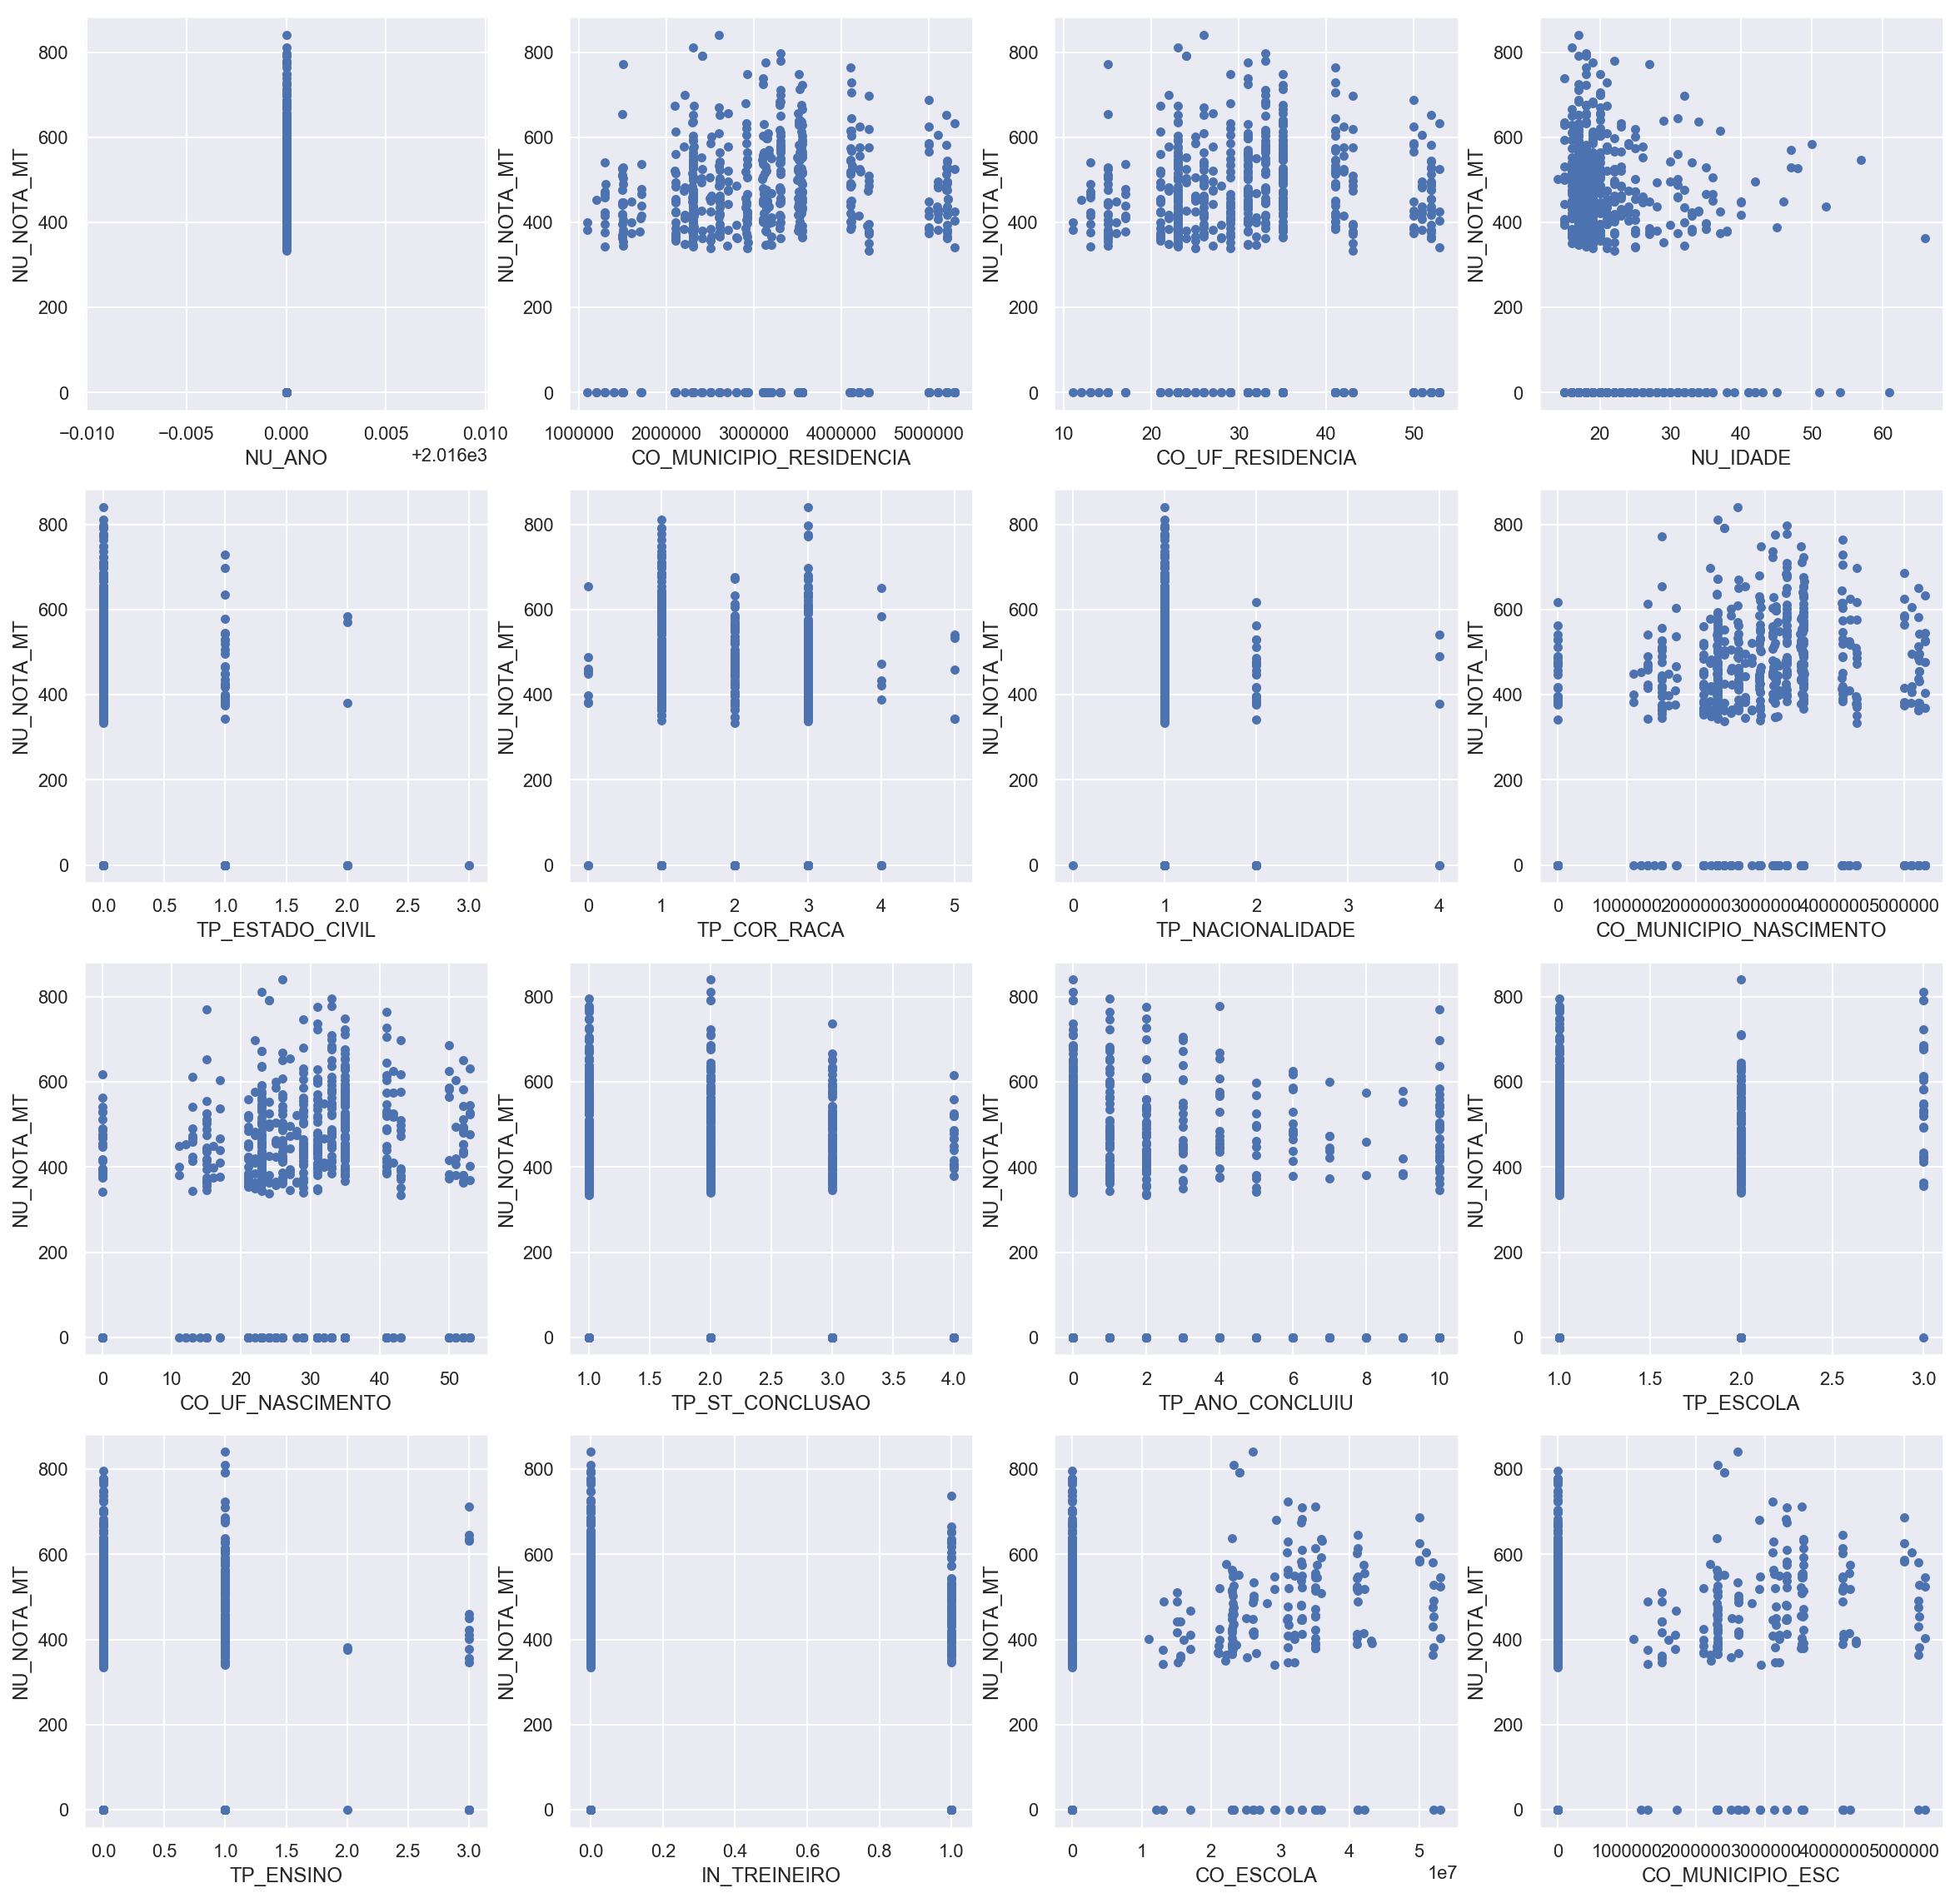

In [413]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20));
quantitative_sample = df.sample(frac=0.05)

for idx, feature in enumerate(features_quantitative):
    quantitative_sample.plot(feature, "NU_NOTA_MT", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4]);

In [518]:
en = df.copy()

In [519]:
en['NU_IDADE'].sort_values().unique()

array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
       30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
       64, 65, 66, 67], dtype=int64)

In [520]:
bins = [0, 13, 17, 20, 25, 30, 40, 50, 67]

In [521]:
en['NU_IDADE'] = pd.cut(en['NU_IDADE'], bins=bins)

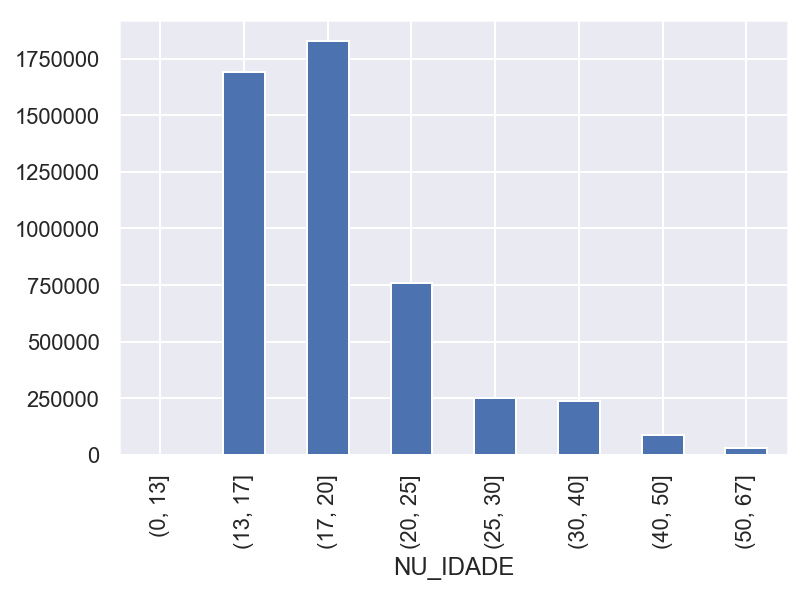

In [522]:
en.groupby('NU_IDADE')['NU_NOTA_MT'].sum().plot('bar')

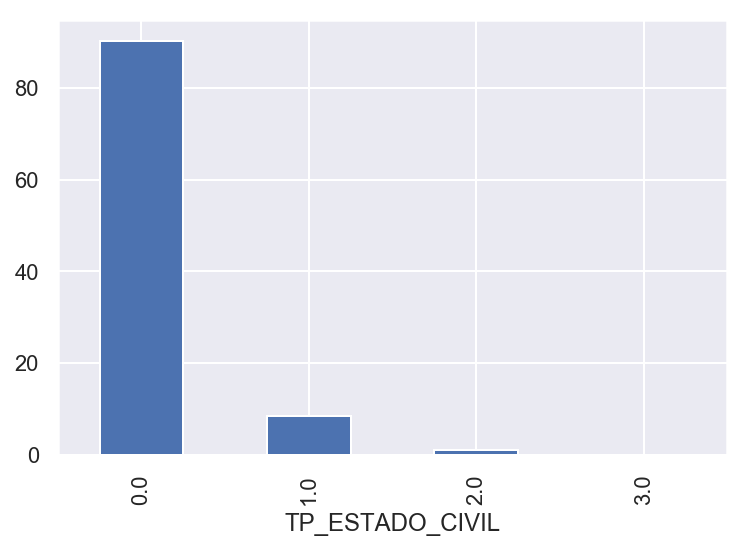

In [523]:
# TAXA DE PARTICIPANTES POR ESTADO CIVIL
((en.groupby('TP_ESTADO_CIVIL').count()['NU_NOTA_MT'] / len(en) * 100.0).T.sort_values(ascending=False)).plot('bar')

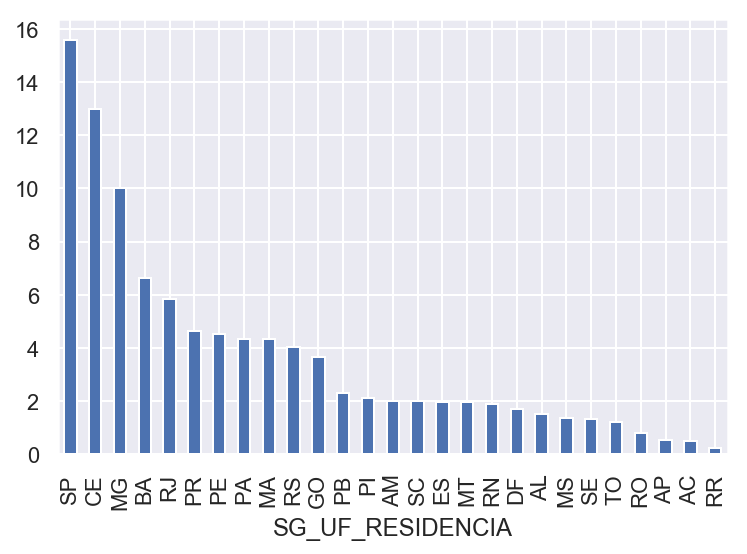

In [524]:
# TAXA DE PARTICIPANTES POR ESTADO
((df.groupby('SG_UF_RESIDENCIA').count()['NU_NOTA_MT'] / len(df) * 100.0).T.sort_values(ascending=False)).plot('bar')

In [525]:
px.box(df, x="TP_ENSINO", y="NU_NOTA_MT", color="TP_DEPENDENCIA_ADM_ESC", notched=True)

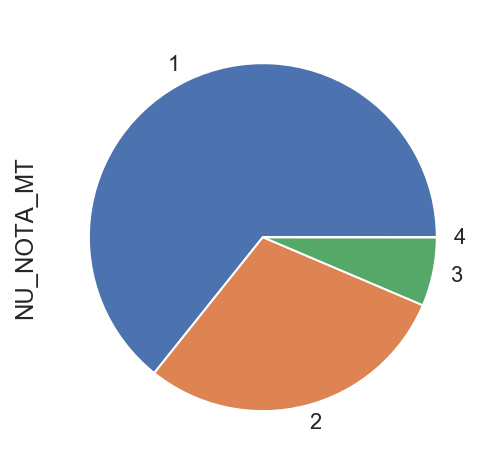

In [526]:
# NOTA MATÉMATICA POR - Tipo de escola do Ensino Médio
(df.groupby('TP_ESCOLA')['NU_NOTA_MT'].sum() / len(df)).plot('pie')

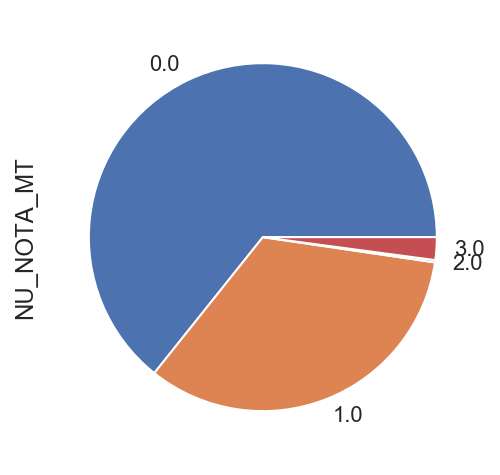

In [527]:
# MAIORES NOTA MATÉMATICA POR - Tipo de instituição que concluiu ou concluirá o Ensino Médio 
df.groupby('TP_ENSINO')['NU_NOTA_MT'].sum().plot('pie')

In [528]:
# TRANSFORMANDA VARIÁVEIS QUALITATIVAS EM NUMERICAS
for c in en[features_qualitative].columns:
    en[c] = pd.Categorical(en[c], categories=en[c].sort_values().unique()).codes

# Avaliando Multicolinearidade e Melhores variáveis

In [558]:
# Testando um modelo
pred = en[en.columns.drop('NU_NOTA_MT')].corrwith(en.NU_NOTA_MT).dropna()
x_test_variables = en[pred.index]
y_test_variables = en['NU_NOTA_MT']

In [559]:
modelo_test = linear_model.LinearRegression(normalize = False, fit_intercept = True)
standardization = StandardScaler()
var_coef_best = make_pipeline(standardization, modelo_test)
var_coef_best.fit(x_test_variables,y_test_variables)
for coef, var in sorted(zip(map(abs, var_coef_best.steps[1][1].coef_), x_test_variables), reverse = True):
    print ("%6.3f %s" % (coef,var))

5223797603815.910 TP_PRESENCA_CN
5223797603752.732 TP_PRESENCA_CH
2481411313239.383 TP_PRESENCA_MT
2481411313158.141 TP_PRESENCA_LC
106917721784.263 NU_NOTA_REDACAO
23397123652.486 NU_NOTA_COMP1
22945041273.235 NU_NOTA_COMP4
22806362394.809 NU_NOTA_COMP2
22150103539.878 NU_NOTA_COMP3
20071082240.160 NU_NOTA_COMP5
307.644 CO_UF_RESIDENCIA
306.561 CO_MUNICIPIO_RESIDENCIA
197.819 CO_UF_PROVA
196.857 CO_MUNICIPIO_PROVA
81.063 NU_NOTA_LC
73.473 NU_NOTA_CN
64.172 CO_ESCOLA
42.225 CO_MUNICIPIO_ESC
20.771 TP_ESCOLA
20.250 CO_UF_ESC
16.111 TX_GABARITO_MT
12.495 TP_DEPENDENCIA_ADM_ESC
12.433 CO_PROVA_MT
10.362 TP_SEXO
8.270 NU_NOTA_CH
7.925 TP_STATUS_REDACAO
6.107 IN_SEM_RECURSO
5.891 CO_PROVA_LC
5.572 Q006
4.762 Q027
4.257 TP_LOCALIZACAO_ESC
4.097 IN_DEFICIENCIA_FISICA
3.742 TX_RESPOSTAS_MT
3.484 IN_LACTANTE
3.243 Q047
3.086 Q037
2.940 TX_RESPOSTAS_LC
2.636 TX_RESPOSTAS_CH
2.530 IN_ACESSO
2.527 IN_GESTANTE
2.498 TP_SIT_FUNC_ESC
2.481 TP_ST_CONCLUSAO
2.442 IN_AMPLIADA_18
2.415 Q035
2.382 NO_MUNI

In [531]:
variables = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_MT', 'TP_PRESENCA_LC', 'NU_NOTA_REDACAO',
            'NU_NOTA_COMP1', 'NU_NOTA_COMP4', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP5', 'CO_UF_RESIDENCIA', 
             'TP_ESCOLA', 'TX_GABARITO_MT','TP_DEPENDENCIA_ADM_ESC', 'TP_SEXO']
variables = en[variables]

In [533]:
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar = 0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap = mpl.cm.coolwarm, alpha = 0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor = False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor = False)
    heatmap.axes.set_xticklabels(variables, minor = False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor = False)
    plt.tick_params(axis = 'both', which = 'both', bottom = 'off', top = 'off', left = 'off', right = 'off') 
    plt.colorbar()
    plt.show()

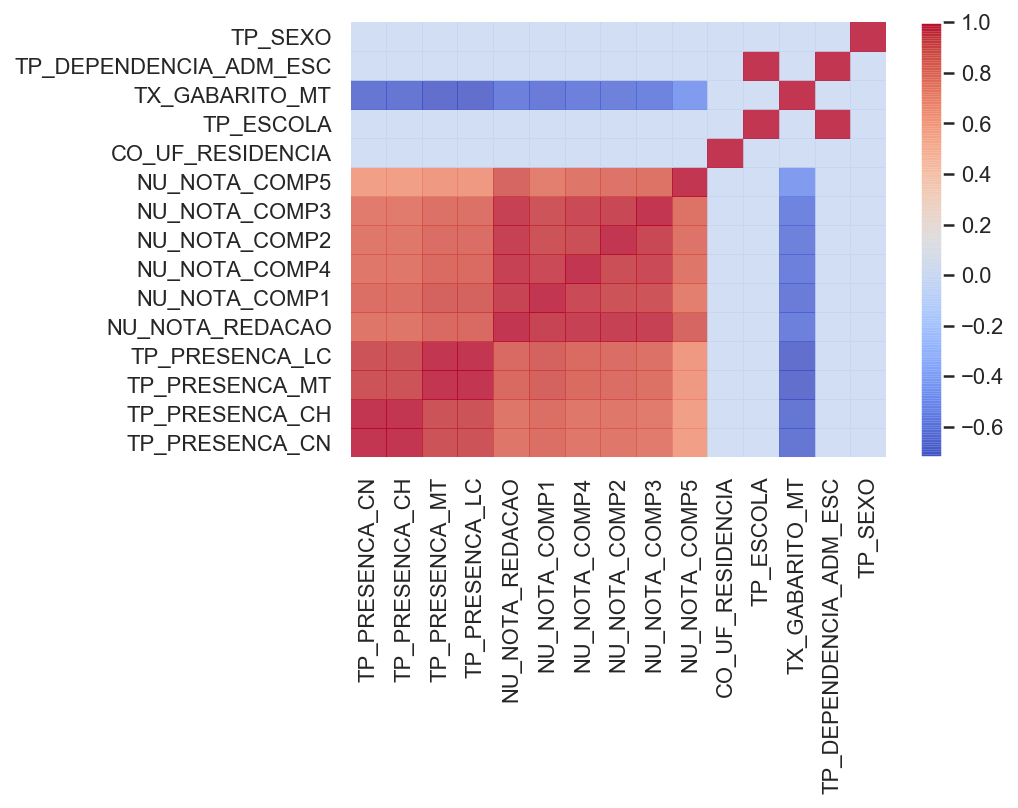

In [534]:
visualize_correlation_matrix(variables, hurdle = 0.5)

# Testando o Teorema do Limite Central

In [535]:
nota_media_esperada_previsao = en['NU_NOTA_MT'].mean(); nota_media_esperada_previsao

356.09260742898647

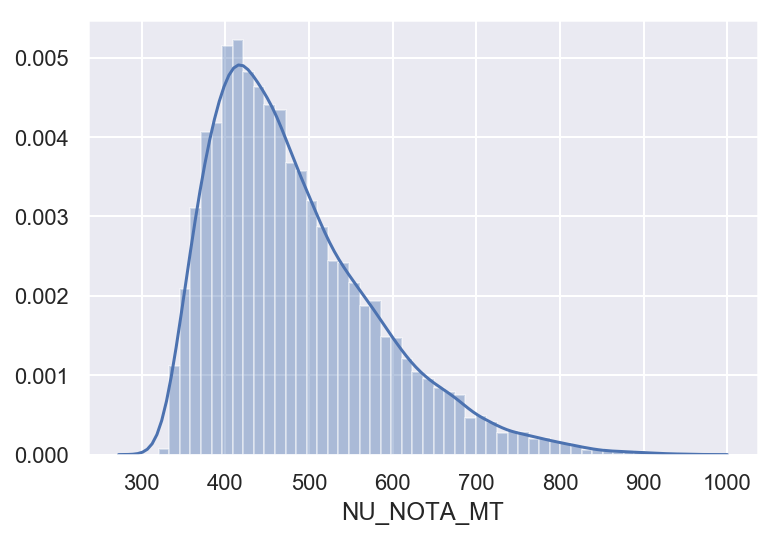

In [536]:
sns.distplot(en.NU_NOTA_MT[en.NU_NOTA_MT > 0])

In [537]:
square_erros = pd.Series(nota_media_esperada_previsao - en['NU_NOTA_MT'])**2

In [538]:
SSE = np.sum(square_erros); SSE.round(2)

718983127.78

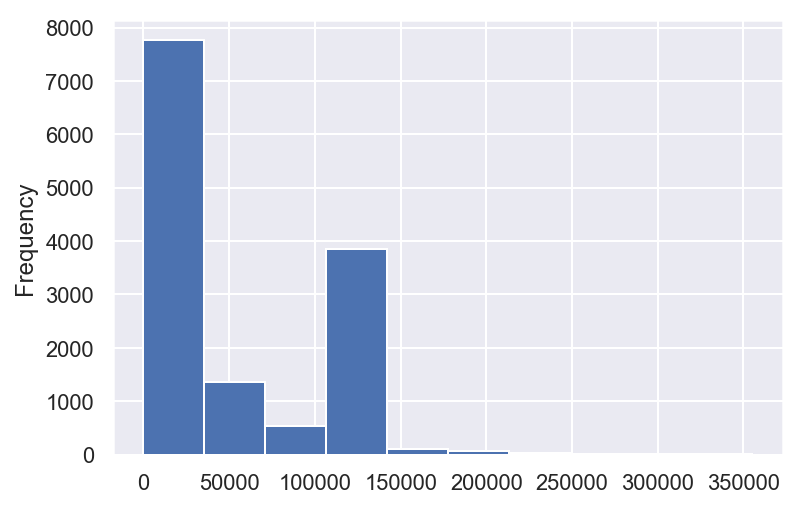

In [539]:
square_erros.plot('hist')

Maioria dos erros está próximo de 0. Ou seja valores próximos da média. Temos uma distrubição normal.

# Cronstruindo o Modelo

In [540]:
# Gerando X e Y
x = variables
y  = en['NU_NOTA_MT'].values

In [541]:
# Criando um modelo
modelo = linear_model.LinearRegression(normalize = False, fit_intercept = True)

In [542]:
# Prodronizando
standardization = StandardScaler()
nota_coef_linear_reg = make_pipeline(standardization, modelo)

In [560]:
def r2_est(x,y):
    return r2_score(y, modelo.fit(x,y).predict(x))

In [561]:
print ('Baseline R2: %0.3f' %  r2_est(x,y))

Baseline R2: 0.883


In [562]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state = 42)

# Treina o modelo
modelo_v2 = modelo.fit(x_train, y_train)

#Calcula métrica R2 do modelo
print ('Baseline R2: %0.3f' %  r2_est(x_train, y_train))

Baseline R2: 0.879


In [563]:
answer = pd.DataFrame()
answer['NU_INSCRICAO '] = x_test.index
answer['NU_NOTA_MT'] = modelo_v2.predict(x_test)

In [564]:
answer.tail()

,NU_INSCRICAO,NU_NOTA_MT
4114,6c63895c84528fc5d20ccc092ea278dcd12fe0b1,493.840727
4115,89133b6843880bf4eb9c456c7f218ccb3d0616db,446.530455
4116,7f40b2cdc85fefaffee824b0c4322866dd7d7d65,456.326299
4117,4c4ac52d0c3c79df73d7961cac37d656d36e9ec4,428.638180
4118,b405410434d1365d1006410e728b0e5315ea91d6,468.504541


In [565]:
answer.to_csv('answer.csv', index=False)

# Fim

### Obrigado - Fabiano Feio - <a href=https://www.linkedin.com/in/fabianofeio/>linkdin.com/fabianofeio</a>